<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/countvector_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [2]:


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
#create a function to trasform text
def transform_text(text):
    # covert to lower case
    text = text.lower()
    # tokenize text
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # remove stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming text
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)



In [5]:
# stemming object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')#apply function to required column
df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

In [6]:
data=df[['new_title','TITLE_OF_INVENTION','IPO_LOCATION','NO_OF_PAGES',	'NO_OF_CLAIMS']]
data

,new_title,TITLE_OF_INVENTION,IPO_LOCATION,NO_OF_PAGES,NO_OF_CLAIMS
0,diesel engin exhaust aftertreat system method ...,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,Mumbai,16.0,18.0
1,vehicl control devic,VEHICLE CONTROL DEVICE,Delhi,29.0,7.0
2,multipl antigen present immunogen composit met...,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,Delhi,107.0,78.0
3,method clean strip turboshaft engin blade use ...,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,Delhi,19.0,10.0
4,materi treatment apparatu,MATERIAL TREATMENT AND APPARATUS,Delhi,22.0,11.0
...,...,...,...,...,...
35201,imag decod method imag encod method imag decod...,IMAGE DECODING METHOD IMAGE ENCODING METHOD I...,Chennai,116.0,16.0
35202,increas commun secur,INCREASED COMMUNICATION SECURITY,Chennai,67.0,23.0
35203,timelin display tool,TIMELINE DISPLAY TOOL,Chennai,21.0,15.0
35204,method manufactur rubber polym rubber reinforc...,METHOD FOR MANUFACTURING RUBBER POLYMER AND RU...,Delhi,18.0,15.0


Silhouette Score for 2 clusters: 0.06760560413242092
Silhouette Score for 3 clusters: 0.050737959301906964
Silhouette Score for 4 clusters: 0.04865310389873573
Silhouette Score for 5 clusters: 0.04838359943417264
Silhouette Score for 6 clusters: 0.027098579881632317
Silhouette Score for 7 clusters: 0.02589316015983793
Silhouette Score for 8 clusters: 0.04021545868225366
Silhouette Score for 9 clusters: 0.030932386887420865
Silhouette Score for 10 clusters: 0.031436306176441775


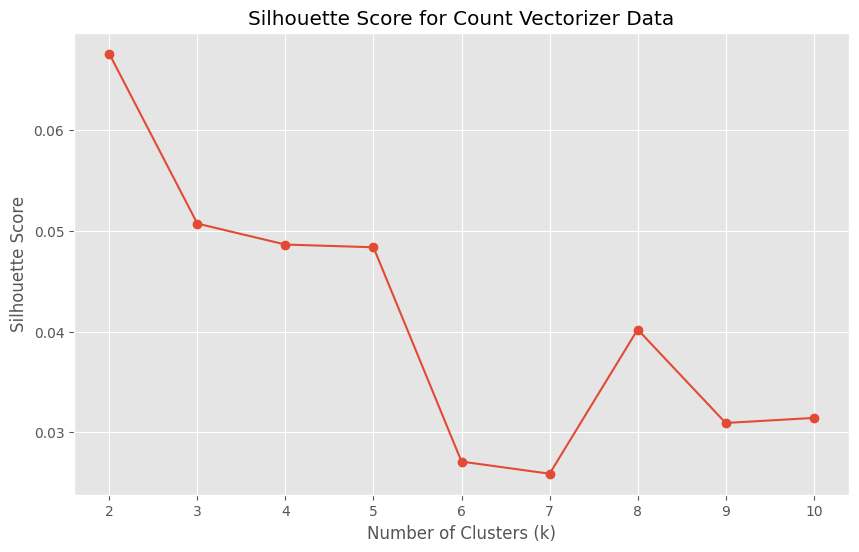

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract the 'new_title' column from the DataFrame
titles = df['new_title']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the 'new_title' data using CountVectorizer
count_vectorized_data = count_vectorizer.fit_transform(titles)

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(count_vectorized_data)
    silhouette_avg = silhouette_score(count_vectorized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Count Vectorizer Data')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.04748171480861377
Silhouette Score for 3 clusters: 0.04213560455275175
Silhouette Score for 4 clusters: 0.07241491519879732
Silhouette Score for 5 clusters: 0.04806149901851472
Silhouette Score for 6 clusters: 0.047372621272003854
Silhouette Score for 7 clusters: 0.05147470113308362
Silhouette Score for 8 clusters: 0.05214787853507344
Silhouette Score for 9 clusters: 0.04423172454925464
Silhouette Score for 10 clusters: 0.05050436120790201


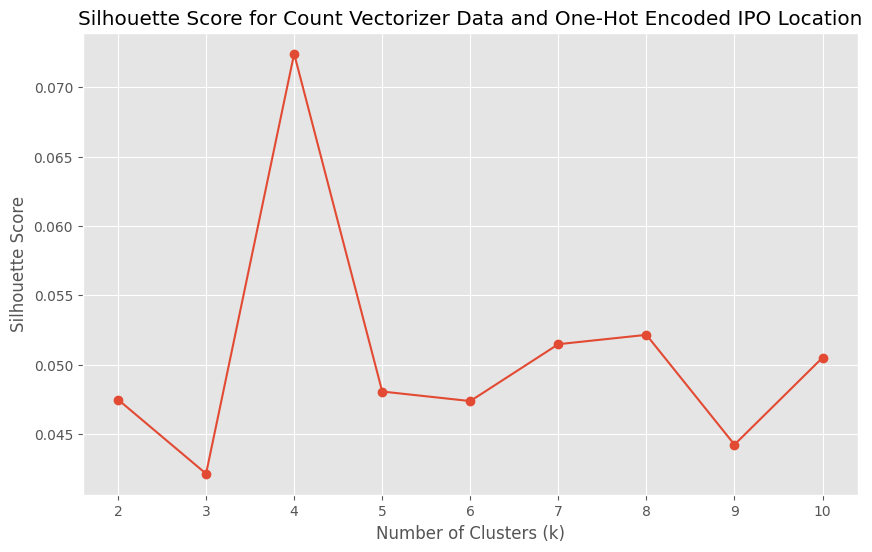

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION']]

# Initialize CountVectorizer for 'new_title'
title_vectorizer = CountVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply CountVectorizer to 'new_title'
title_vectorized_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_vectorized_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Count Vectorizer Data and One-Hot Encoded IPO Location')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.18910723048942965
Silhouette Score for 3 clusters: 0.25520435263067903
Silhouette Score for 4 clusters: 0.29476171113169114
Silhouette Score for 5 clusters: 0.17658896698093157
Silhouette Score for 6 clusters: 0.08445677366069376
Silhouette Score for 7 clusters: 0.08497120801032998
Silhouette Score for 8 clusters: 0.08500464001478514
Silhouette Score for 9 clusters: 0.0854856692700778
Silhouette Score for 10 clusters: 0.05281222278861741


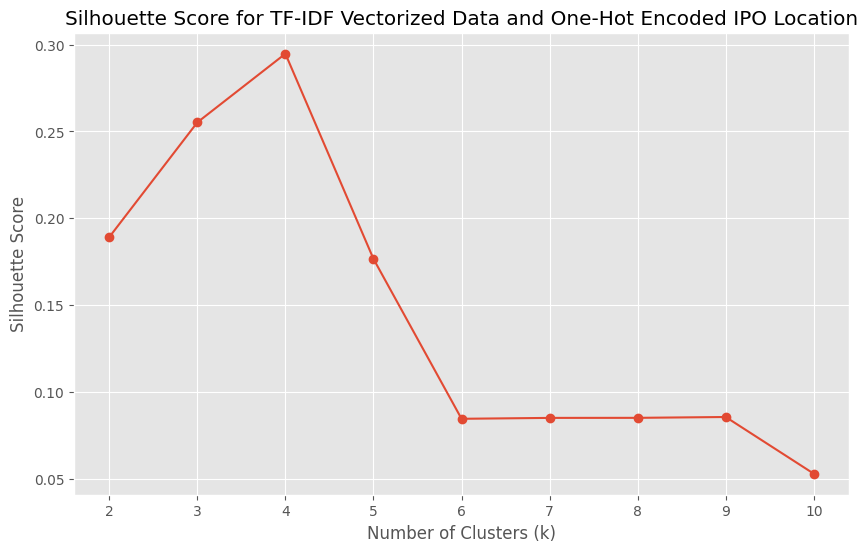

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace 'your_dataset.csv' with your actual file path if your data is in a CSV file

# Extract 'new_title' and 'IPO_LOCATION' columns from the DataFrame
titles = df['new_title']
locations = df[['IPO_LOCATION']]

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine the sparse matrices using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for TF-IDF Vectorized Data and One-Hot Encoded IPO Location')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score for 2 clusters: 0.8745088440221721
Silhouette Score for 3 clusters: 0.7167236538257246
Silhouette Score for 4 clusters: 0.5633916698688098
Silhouette Score for 5 clusters: 0.5456928855509529
Silhouette Score for 6 clusters: 0.46547849635874794
Silhouette Score for 7 clusters: 0.46174820790821275
Silhouette Score for 8 clusters: 0.4589364086052513
Silhouette Score for 9 clusters: 0.39923868605042356
Silhouette Score for 10 clusters: 0.4029412785591987


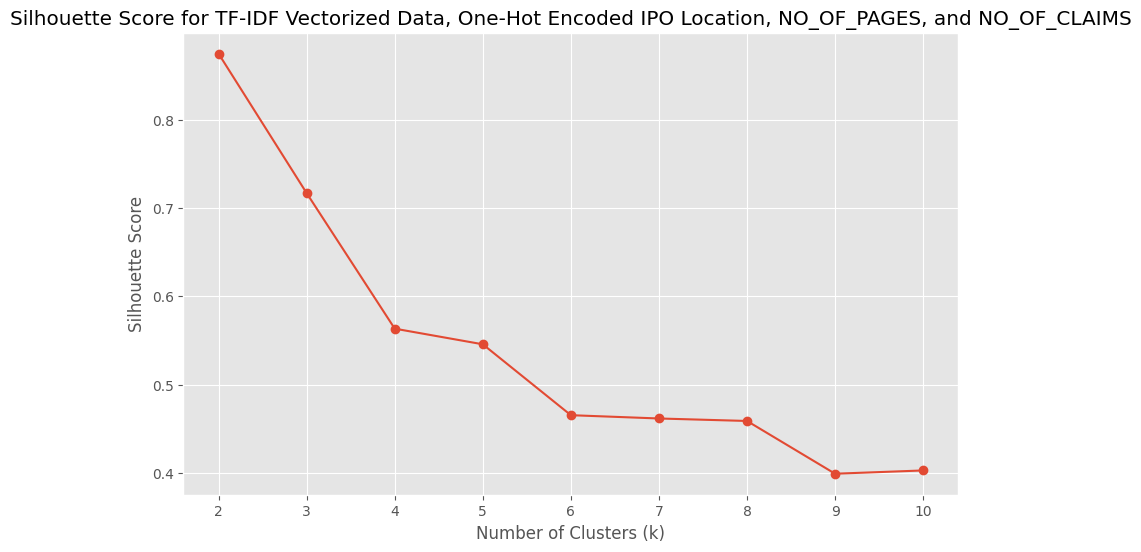

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mounting google drive


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')
df.dropna(inplace=True)

df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

# Sample data

# Create a DataFrame from the sample data


# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION']]
no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_tfidf_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for TF-IDF Vectorized Data, One-Hot Encoded IPO Location, NO_OF_PAGES, and NO_OF_CLAIMS')
plt.grid(True)
plt.show()


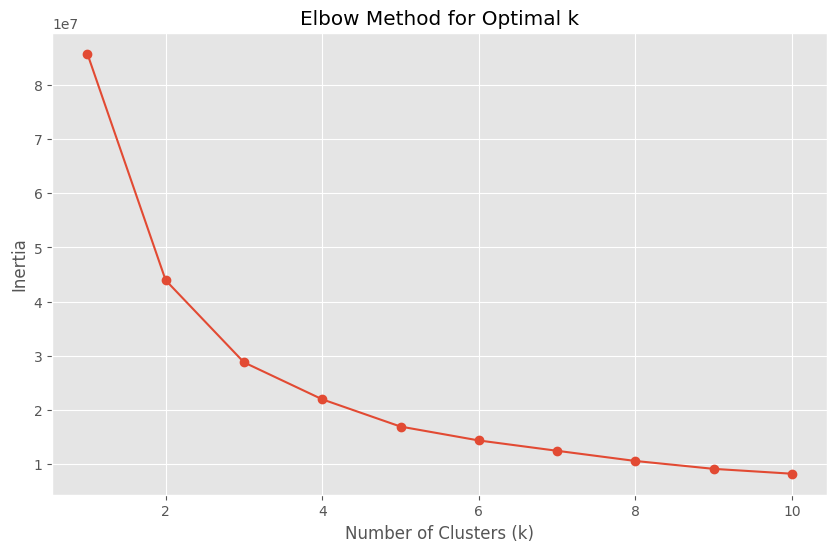

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION']]
no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_tfidf_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate inertia (within-cluster sum of squares) for different values of k
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [14]:
# ... (your code for data preparation and calculation of inertia) ...

# Find the optimal number of clusters using the elbow method
optimal_k = 1  # Default value
min_slope = float('inf')

# Calculate slopes between consecutive points on the inertia curve
slopes = [inertia[i] - inertia[i - 1] for i in range(1, len(inertia))]

# Find the index with the minimum slope
for i in range(len(slopes)):
    if slopes[i] < min_slope:
        min_slope = slopes[i]
        optimal_k = i + 1  # Add 1 to account for the index offset

print(f"Optimal number of clusters (k) based on the elbow method: {optimal_k}")

Optimal number of clusters (k) based on the elbow method: 1


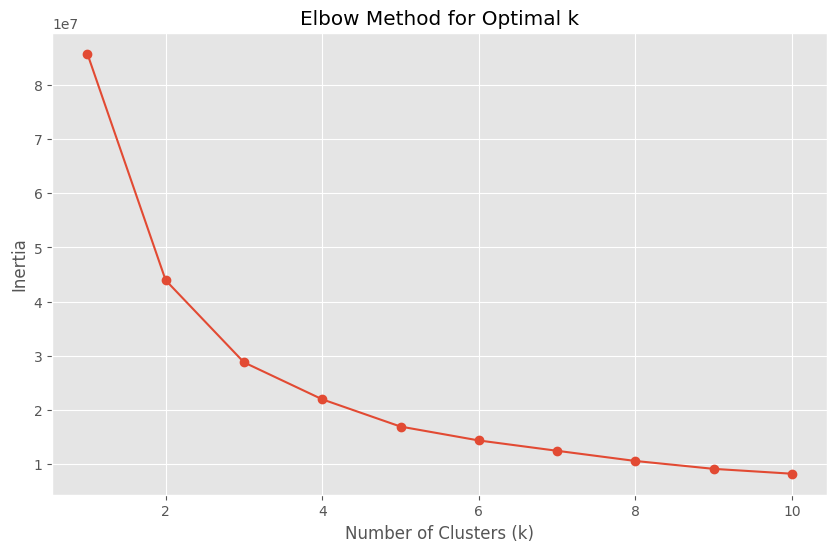

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION']]
#no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
#no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize TF-IDF Vectorizer for 'new_title'
title_vectorizer = TfidfVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply TF-IDF Vectorization to 'new_title'
title_tfidf_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_tfidf_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_tfidf_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate inertia (within-cluster sum of squares) for different values of k
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [13]:
# ... (your code for data preparation and calculation of inertia) ...

# Find the optimal number of clusters using the elbow method
optimal_k = 1  # Default value
min_slope = float('inf')

# Calculate slopes between consecutive points on the inertia curve
slopes = [inertia[i] - inertia[i - 1] for i in range(1, len(inertia))]

# Find the index with the minimum slope
for i in range(len(slopes)):
    if slopes[i] < min_slope:
        min_slope = slopes[i]
        optimal_k = i + 1  # Add 1 to account for the index offset

print(f"Optimal number of clusters (k) based on the elbow method: {optimal_k}")


Optimal number of clusters (k) based on the elbow method: 1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score for 2 clusters: 0.8730760465548405
Silhouette Score for 3 clusters: 0.7152188110287427
Silhouette Score for 4 clusters: 0.5854596563501747
Silhouette Score for 5 clusters: 0.5362984612908669
Silhouette Score for 6 clusters: 0.46852997748035013
Silhouette Score for 7 clusters: 0.44945273974171845
Silhouette Score for 8 clusters: 0.44515363184211615
Silhouette Score for 9 clusters: 0.3860765686079226
Silhouette Score for 10 clusters: 0.38394000894986285


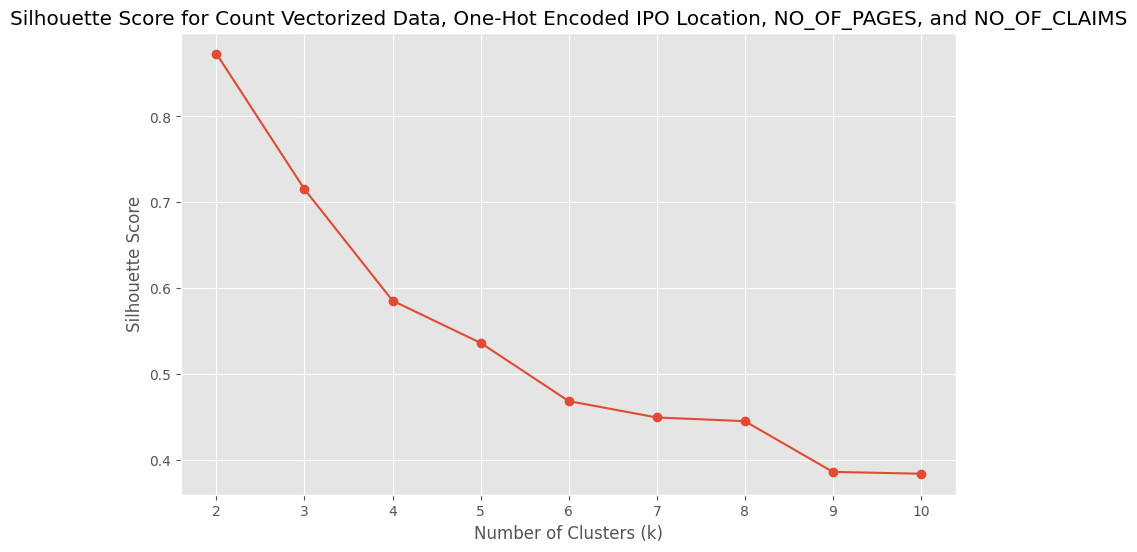

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from Excel file and preprocess
df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')
df.dropna(inplace=True)
df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

# Extract 'new_title', 'IPO_LOCATION', 'NO_OF_PAGES', and 'NO_OF_CLAIMS' columns
titles = df['new_title']
locations = df[['IPO_LOCATION']]
no_of_pages = df['NO_OF_PAGES'].values.reshape(-1, 1)
no_of_claims = df['NO_OF_CLAIMS'].values.reshape(-1, 1)

# Initialize CountVectorizer for 'new_title'
title_vectorizer = CountVectorizer()

# Initialize OneHotEncoder for 'IPO_LOCATION'
location_encoder = OneHotEncoder()

# Apply CountVectorizer to 'new_title'
title_count_data = title_vectorizer.fit_transform(titles)

# Apply OneHotEncoder to 'IPO_LOCATION'
location_encoded_data = location_encoder.fit_transform(locations)

# Combine 'title_count_data', 'location_encoded_data', 'no_of_pages', and 'no_of_claims' using hstack
combined_data = hstack([title_count_data, location_encoded_data, no_of_pages, no_of_claims])

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Count Vectorized Data, One-Hot Encoded IPO Location, NO_OF_PAGES, and NO_OF_CLAIMS')
plt.grid(True)
plt.show()
